## How to install NLTK corpus like Gutenberg dataset...

### Step 1: Start the NLTK Interpreter
### Step 2: Type import nltk
### Step 3: Type nltk.download
### Step 4: A new screen entitled "NLTK Downloader" pops up
### Step 5: Choose to install the option " Everything used in NLTK book", then click on "Download" button

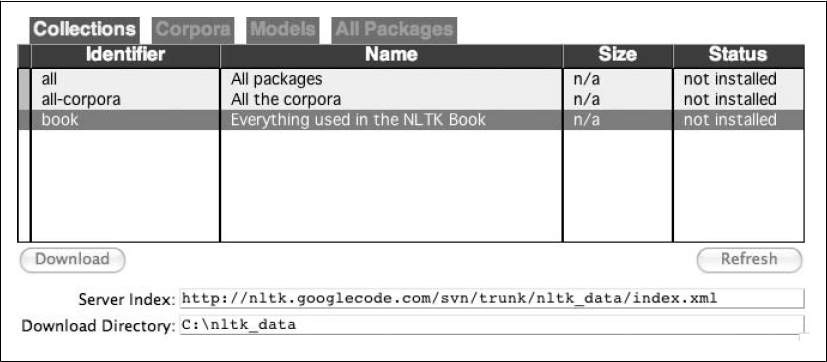

In [2]:
from IPython.display import Image
Image(filename='Data/IPythonDownloader.png')

## Smoothing
P <sub>Add-k</sub>(w<sub>i-1</sub>|w<sub>i</sub>) =c(wi-1;wi)+k/(c(wi-1)+kV) where V is the number of tokens
<br/>
Kneser- Ney Smoothing
P<sub>KN</sub>(wi|wi-1) =max(c(w<sub>i-1</sub>;w<sub>i</sub>)-d;0)/c(w<sub>i</sub>-1) + d/c(w<sub>i-1</sub>)*P<sub>continuation</sub>(w<sub>i</sub>)
<br/>
P<sub>continuation</sub>(w<sub>i</sub>)=|{w<sub>i-1</sub> : c(w<sub>i-1</sub>,w)>0}|/ |{(w<sub>j-1</sub>,w<sub>j</sub>) : c(w<sub>j-1</sub>,w<sub>j</sub>)>0}|

In [2]:
from nltk.util import ngrams
import nltk
token=nltk.word_tokenize(nltk.corpus.gutenberg.raw(nltk.corpus.gutenberg.fileids()[0]))
counting=[]
#Removing Comma, ...
for item in token:
     if(item==u',' or u'.' or u'--' or u'!'):
         token.remove(item)    
bigrams=list(ngrams(token,2))
bigramSet= set(bigrams)
i=0
t1=[]
t2=[]
#Displayed only 200 entries for fast processing
for item in bigramSet:
    if i>200:
        break;
    counting.append(bigrams.count(item) + 1)
    if (counting[i] -2)<0:
        t1.append(0)
    else:
        t1.append((counting[i]-2)/float(token.count(item[0])))
    n1=0
    n2=0
    for term in bigramSet:
        if(term[0]==item[0]):
            n1=n1+1
        if(term[1]==item[1]):
            n2=n2+1
    t2.append(n1*n2/float(token.count(item[0])*len(bigrams)))
    i=i+1
i=0
print "BiGram -> Without Smoothing, Add 1, Add 5, Kneser-Ney"
for item in bigramSet:
    if i>200:
        break;
    print "%s -> %f %f %f %f" %(item,(counting[i]-1)/float(token.count(item[0])),counting[i]/float((token.count(item[0])+ len(bigramSet))),(counting[i] +4)/float((token.count(item[0])+ 5*len(bigramSet))),t1[i]+t2[i])
    i=i+1


 BiGram -> Without Smoothing, Add 1, Add 5, Kneser-Ney
(u'her', u'taste') -> 0.003410 0.000119 0.000044 0.002607
(u'form', u'or') -> 0.111111 0.000049 0.000029 0.001067
(u'every', u'kind') -> 0.004902 0.000049 0.000029 0.000071
(u'altogether', u'affectionate') -> 0.062500 0.000049 0.000029 0.000052
(u'pity', u'me') -> 0.307692 0.000123 0.000044 0.231463
(u'indifferent', u'appear') -> 0.076923 0.000049 0.000029 0.000116
(u'still', u'at') -> 0.042553 0.000074 0.000034 0.023363
(u'Mr.', u'seems') -> 0.001789 0.000048 0.000029 0.000019
(u'Cole', u'a') -> 0.037037 0.000049 0.000029 0.003324
(u'He', u'trifles') -> 0.004425 0.000049 0.000029 0.000008
(u'adversary', u'self-approbation') -> 1.000000 0.000049 0.000029 0.000010
(u'pursuit', u'of') -> 0.500000 0.000049 0.000029 0.008243
(u'want', u'you') -> 0.041667 0.000074 0.000034 0.021866
(u'think', u'are') -> 0.004926 0.000049 0.000029 0.000332
(u'he', u'entered') -> 0.001493 0.000048 0.000029 0.000033
(u'too', u'scrupulous') -> 0.008065 0.00

## Perplexity
Perplexity = P(w1w2 : : :wN) <sup>-1/N</sup>
<br/>
For Unigram Model: P(w<sub>i</sub>)= count(w<sub>i</sub>)/No. of tokens
<br/>
For Bigram Model: P(w<sub>i</sub>|w<sub>i-1</sub>)= count(w<sub>i-1</sub>w<sub>i</sub>)/count(w<sub>i-1</sub>)
<br/>
For Trigram Model: P(w<sub>i</sub>|w<sub>i-2</sub>w<sub>i-1</sub>)= count(w<sub>i-2</sub>w<sub>i-1</sub>w<sub>i</sub>)/count(w<sub>i-2</sub>w<sub>i-1</sub>)



In [10]:


from nltk.util import ngrams
import nltk
token=nltk.word_tokenize(nltk.corpus.gutenberg.raw(nltk.corpus.gutenberg.fileids()[0]))
#Removing Comma, ...
for item in token:
     if(item==u',' or u'.' or u'--' or u'!'):
         token.remove(item)    
bigrams=list(ngrams(token,2))
bigramSet= set(bigrams)
trigrams=list(ngrams(token,3))
trigramSet= set(trigrams)
perplexity1=float(1.0)
n= len (token)
i=0
for item in token:
    perplexity1=perplexity1*((1/float(token.count(item)))**(1./n))
    i=i+1
perplexity1=(perplexity1)*len(token)
print "Unigram perplexity = %f" %(perplexity1)
perplexity2=1.0
i=0
k=0
for item in bigramSet:
    perplexity2= perplexity2*(((1/float(bigrams.count(item)))*token.count(item[0]))**(1./n))
    i=i+1
print "Bigram perplexity = %f" %(perplexity2)
perplexity3=1.0
i=0
for item in trigramSet:
       perplexity3=perplexity3*(((1/float(trigrams.count(item)))*bigrams.count(item[0:2]))**(1./n))
       i=i+1
#perplexity3 = perplexity3)) * ((n+k)/n)
print "Trigram perplexity = %f" %(perplexity3)

Unigram perplexity = 440.086258
Bigram perplexity = 5.018932
Trigram perplexity = 2.845053


## Backoff
P(w<sub>i</sub>|w<sub>i-2</sub>w<sub>i-1</sub>)= <br/>
         &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;P(w<sub>i</sub>|w<sub>i-2</sub>w<sub>i-1</sub>) if count(w<sub>i-2</sub>w<sub>i-1</sub>w<sub>i</sub>)>0<br/>
                  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lambda;1P(w<sub>i</sub>|w<sub>i-1</sub>) if count(w<sub>i-2</sub>w<sub>i-1</sub>w<sub>i</sub>)>0 and count(w<sub>i-1</sub>w<sub>i-1</sub>)>0<br/>
                  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lambda;2P(w<sub>i</sub>)
 <br/>
 Considering an example with 5 strings 1)"impose directed misfortunes" 2) "find out why" 3) "I used to" 4) "it was before" 5) "lets do it" with &lambda;1 and &lambda;2 values assumed to be 1

In [42]:
str= {("impose","directed","misfortunes"),("find", "out", "why"),("I","used","to"),("it","was","before"),("lets","do","it")}
for item in str:
   print item
   if trigrams.count(item)>0:
      print "Prob with trigram = %f" %(trigrams.count(item)/float(bigrams.count(item[1:3])))
   else:
      if bigrams.count(item[1:3])>0:
        print "Prob with bigram= %f" %(bigrams.count(item[1:3])/float(token.count(item[1])))
      else:
        print "Prob with unigram= %f" %(token.count(item[2])/float(len(token)))

    

('find', 'out', 'why')
Prob with unigram= 0.000115
('impose', 'directed', 'misfortunes')
Prob with trigram = 1.000000
('I', 'used', 'to')
Prob with trigram = 0.142857
('it', 'was', 'before')
Prob with trigram = 0.166667
('lets', 'do', 'it')
Prob with bigram= 0.028470


Developer - Mayank Bhasin<br>
Email - mayankbhasin@gmail.com